In [1]:
import pertpy as pt
import scanpy as sc
import numpy as np

Unable to contact PyPI to check for the latest pertpy version. Do you have an internet 
connection?

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
mudata = pt.data.burczynski_crispr()

C:\Users\sergei.rybakov\Apps\Miniconda3\envs\poetry\lib\site-packages\mudata\_core\mudata.py:376: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [4]:
sc.pp.normalize_total(mudata['rna'])

In [5]:
sc.pp.log1p(mudata['rna'])

In [6]:
sc.pp.highly_variable_genes(mudata['rna'], subset=True)

In [7]:
sc.pp.pca(mudata['rna'])

In [8]:
sc.pp.neighbors(mudata['rna'], metric='cosine')

In [9]:
sc.tl.umap(mudata['rna'])

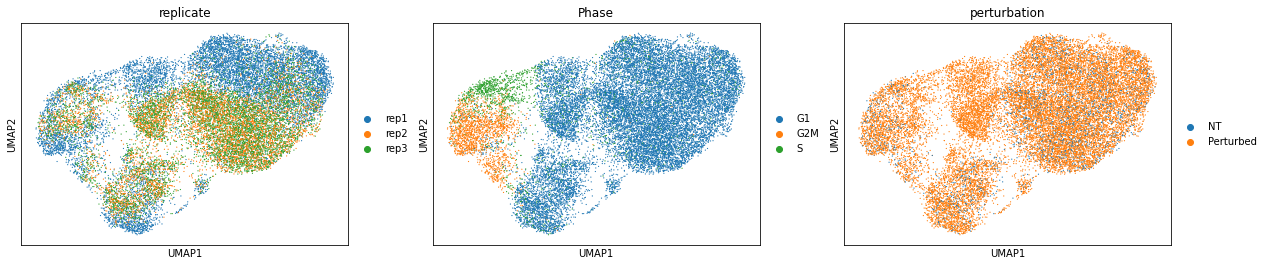

In [18]:
sc.pl.umap(mudata['rna'], color=['replicate', 'Phase', 'perturbation'])

In [11]:
pt.tl.pert_sign(mudata['rna'], 'perturbation', 'NT', 'replicate', n_pcs=40)

C:\Users\sergei.rybakov\Apps\Miniconda3\envs\poetry\lib\site-packages\scipy\sparse\_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\sergei.rybakov\Apps\Miniconda3\envs\poetry\lib\site-packages\scipy\sparse\_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\sergei.rybakov\Apps\Miniconda3\envs\poetry\lib\site-packages\scipy\sparse\_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [12]:
adata_pert = mudata['rna'].copy()

In [13]:
adata_pert.X = adata_pert.layers['X_pert']

In [14]:
sc.pp.pca(adata_pert)

In [15]:
sc.pp.neighbors(adata_pert, metric='cosine')

In [16]:
sc.tl.umap(adata_pert)

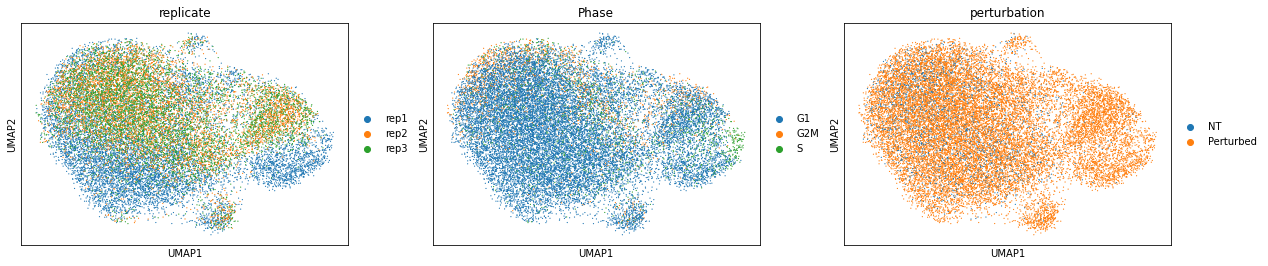

In [17]:
sc.pl.umap(adata_pert, color=['replicate', 'Phase', 'perturbation'])